In [1]:
import numpy as np
from scipy.special import rel_entr
import matplotlib.pylab as plt

We first create a uniformly distributed random variable $p$.

In [2]:
N = 1000000
p = np.random.randint(0, 13, size = N)
p = np.bincount(p)
p = p / np.sum(p)

Then we create two other random variables $q$ and $w$ that are binomially distributed.

In [3]:
q = np.random.binomial(12, 0.9, size = N)
q = np.bincount(q)
q = q / np.sum(q)

In [4]:
w = np.random.binomial(12, 0.4, size = N)
w = np.bincount(w)
w = w / np.sum(w)

Then we calculate their Kullback-Leibler divergences. We can see that w and p actually have a very significant similarity, while q and p are very different. We even get an infinity for the divergence between q and w, which is caused by the fact that q has a probability of 0 for some values.

The result shows that the binomial distribution with parameters (12, 0.9) is more divergent from the uniform distribution than the binomial distribution with parameters (12, 0.4).

In [26]:
print(rel_entr(q, p).sum())
print(rel_entr(w, p).sum())
print(rel_entr(q, w).sum())
print(rel_entr(w, q).sum())

1.1841853427328082
0.6188614272138067
6.6137095273896955
inf


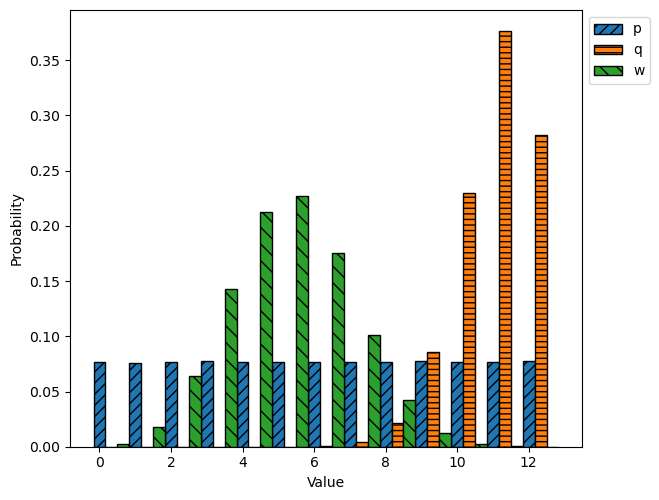

In [27]:
plt.bar(np.arange(13),p,0.333,hatch="///",edgecolor='k')
plt.bar(np.arange(13)+0.333,q,0.333,hatch="---",edgecolor='k')
plt.bar(np.arange(13)+0.666,w,0.333,hatch="\\\\",edgecolor='k')
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend(["p", "q", "w"], loc='upper left',bbox_to_anchor=(1,1))
plt.tight_layout(pad=0,h_pad=0,w_pad=0)
plt.show()